# CREDIT ANALYSIS

# - Summary data -

## Context 

## Content & Explanation
## There're two tables could be merged by ID:

### application_record.csv

### credit_record.csv

#  Task

- dari data tersebut silahkan eksplorasikan data tersebut se detail dan semenarik mungkin.
- ceritakan data tersebut se detail dan semenarik mungkin
- lakukan analisis yg paling memungkinkan dari data tersebut. 
- bahasa pemrograman yang di gunakan adalah python.


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## extract data using two data source

In [2]:
app = pd.read_csv("application_record.csv")
crecord = pd.read_csv("credit_record.csv")

In [3]:
app.head(10) 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [4]:
crecord.head(10) 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


## 1. Data Preparation and Data Cleansing

### Data Framing

In [5]:
app.info() #data framing application_record from pandas package

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
ID                     438557 non-null int64
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+ MB


In [6]:
crecord.info() #data framing credit_record from pandas package

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
app['ID'].nunique() 
#untuk menghitung unique value dari index. secara default tidak menghitung NaN values / dropna bernilai true 
#total dari row app adalah 438,557. ini artinya app memiliki duplikat 

438510

In [8]:
crecord['ID'].nunique() 
# crecord memiliki sekitar 43,000 unique values. 
# yang mana berarti terdapat record yg nilai nya sama di kolom montly values dan status 

45985

In [9]:
len(set(crecord['ID']).intersection(set(app['ID']))) 
# untuk mengecek berapa values yang memiliki kesamaan dari dua dataset

36457

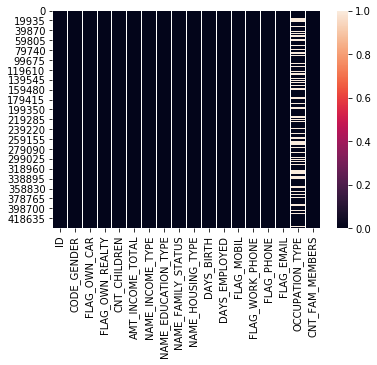

In [10]:
sns.heatmap(app.isnull()) 
# untuk mengecek null values. Occupation_type memiliki null values 

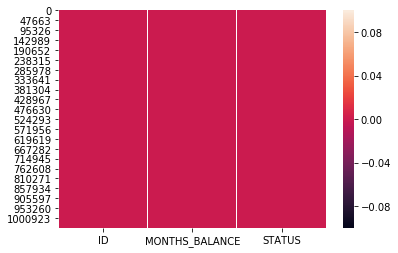

In [11]:
sns.heatmap(crecord.isnull()) 
# Aman 

### Handling duplicate and missing data

In [12]:
app = app.drop_duplicates('ID', keep = 'last')
# setelah data framing ditemukan beberapa duplicates values 
# menghapus duplicates values , dan akan meng-keep the last entries dari ID jika ada yg sama lagi 

In [13]:
app.drop('OCCUPATION_TYPE', axis = 1, inplace = True)
# karna banyak missing values nya, kolom OCCUPATION_TYPE di drop.
# The axis to use. 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise.


### Separating categorical and numerical data.

In [14]:
ot = pd.DataFrame(app.dtypes == 'object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
# memfilter kolom yg memiliki non numeric values
# untuk melihat apakah ada kolom yg dpt digunakan dlm proses analisis
# A data type object (an instance of numpy. dtype class)

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [15]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns = {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
# untuk membuat list yg terpisah dari numeric type. 
# dibutuhkan dlm proses analisis kedepannya

In [16]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n", b,"\n", c,"\n", d,"\n", e,"\n", f,"\n", g)

#tahap ini hanya untuk melihat apa saja yang ada didalam kolom 
#terlihat dalam kalam kalau semua nya ini penting karna terdapat 
# klasifikasi yg bagus di tiap kolom nya
#object values ini nanti nya akan di convert ke numeric values

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

### Encoder 

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes == 'object':
        app[x] = le.fit_transform(app[x])
# mengubah non numeric data columns menjadi data columns
# metode ini menggunakan klasifikasi 0,1.. ke value type yg berbeda
# yang tadi nya data type nya object menjadi numeric

In [18]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


In [19]:
app[num_type].head()
#melihat numeric columns jika ada yg perlu diubah
#list num_type yg tadi dipisah

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


### Outliers removal

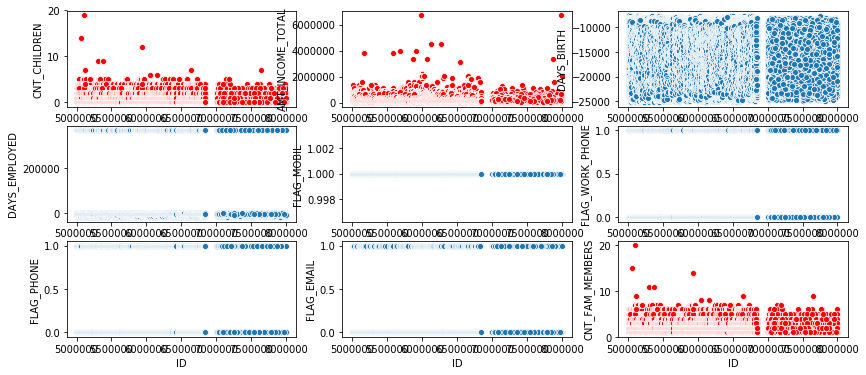

In [20]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize=(14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color='red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color='red')
    

In [21]:
# KOLOM CNT_CHILDREN 
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [22]:
# KOLOM AMT_INCOME_TOTAL
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app = app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [23]:
# KOLOM CNT_FAM_MEMBERS
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app = app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

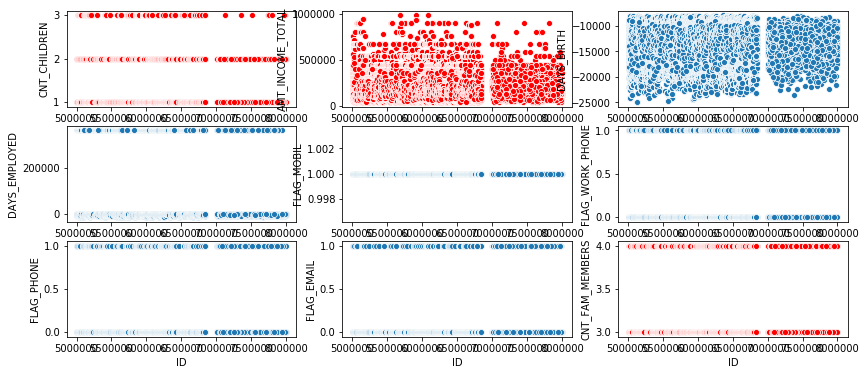

In [24]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize=(14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color='red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color='red')

### prepos credit record file

In [25]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID', 'Months from today'], ascending=True)
crecord.head(10)
# mengakumulasi kolom 'Months from today' untuk melihat berapa lama bulan nya
# men-sort data berdasarkan kolom 'ID' dan 'Months from today'

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [26]:
crecord['STATUS'].value_counts()
#menunjukkan brp banyak values yang ada

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [27]:
crecord['STATUS'].replace(to_replace = ['C', 'X'], value = [0, 0], inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace value C dan X dengan 0 agar type nya sama
# 1,2,3,4,5 merupakan 1 klasifikasi yang type nya sama
# ini merupakan label hasil dari model yg sudah di buat

In [28]:
crecord['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [30]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
#dgn join 2 dataset akan menyelesaikan masalah oversampling

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


### Join Dataset

In [29]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head()
#grouping dataset crecord by 'ID' untuk bisa join dengan dataset 1 nya

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [31]:
df.info()
# cek total baris dan kolom 
# total 9516 baris dan 18 kolom

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
ID                     9516 non-null int64
CODE_GENDER            9516 non-null int32
FLAG_OWN_CAR           9516 non-null int32
FLAG_OWN_REALTY        9516 non-null int32
CNT_CHILDREN           9516 non-null int64
AMT_INCOME_TOTAL       9516 non-null float64
NAME_INCOME_TYPE       9516 non-null int32
NAME_EDUCATION_TYPE    9516 non-null int32
NAME_FAMILY_STATUS     9516 non-null int32
NAME_HOUSING_TYPE      9516 non-null int32
DAYS_BIRTH             9516 non-null int64
DAYS_EMPLOYED          9516 non-null int64
FLAG_MOBIL             9516 non-null int64
FLAG_WORK_PHONE        9516 non-null int64
FLAG_PHONE             9516 non-null int64
FLAG_EMAIL             9516 non-null int64
CNT_FAM_MEMBERS        9516 non-null float64
STATUS                 9516 non-null int64
dtypes: float64(2), int32(7), int64(9)
memory usage: 1.1 MB


In [34]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
34,5008843,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
46,5008854,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
47,5008855,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
48,5008856,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
49,5008857,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0


## 2. MODEL

### split dataset (data train and data test)

In [39]:
X = df.iloc[:,1:-1] # value X terdiri dari seluruh variabel kecuali label 
y = df.iloc[:,-1] # merupakan label

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# membuat test train split terlebih dahulu

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# untuk mencocokan dan mengubah data ke scaler untuk pembacaan dan hasil yg akurat

In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# mengatasi masalah oversampling dgn SMOTE

In [44]:
y_train.value_counts()

0    6553
1     108
Name: STATUS, dtype: int64

In [46]:
y_balanced.value_counts()

1    6553
0    6553
Name: STATUS, dtype: int64

In [47]:
y_test.value_counts()

0    2812
1      43
Name: STATUS, dtype: int64

In [48]:
y_test_balanced.value_counts()

1    2812
0    2812
Name: STATUS, dtype: int64

### implement different models to see which one performs the best

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [52]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.6034640622615596, 0.9764230123607508, 0.9271326110178544, 0.9942011292537769, 0.9942011292537769, 0.9939722264611628]
[0.6137980085348507, 0.781294452347084, 0.8342816500711238, 0.8524182076813656, 0.8330369843527738, 0.9390113798008535]


### Determine the “best” solution 

In [53]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2812
           1       0.99      0.89      0.94      2812

    accuracy                           0.94      5624
   macro avg       0.94      0.94      0.94      5624
weighted avg       0.94      0.94      0.94      5624

